<a href="https://colab.research.google.com/github/ParthGadekar0631/Heart_Disease_Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Prediction


### Data Preparation

In [ ]:
# Importing all the necessary libraries that would be needed in the project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, mean_squared_error, r2_score, roc_curve, auc
from sklearn.model_selection import cross_val_score

In [ ]:
# loading the csv data to a Pandas DataFrame
df = pd.read_csv('heart_2022_no_nans.csv')

# print the first 5 rows of the dataset
df.head()

In [ ]:
# Encode categorical variables
df_encoded = df.copy()
le = LabelEncoder()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])
df_encoded.head()

In [ ]:
# Getting information about the dataset
df_encoded.info()

In [ ]:
# Checking for missing values
df_encoded.isnull().sum()

In [ ]:
# Define numerical columns
target_col = 'HadHeartAttack'  # Dependent variable
numerical_cols = df.drop(columns=[target_col]).select_dtypes(include=['int64', 'float64']).columns

# Boxplot to visualize outliers
plt.figure(figsize=(15, 8))
df[numerical_cols].boxplot(rot=45)
plt.title('Boxplot of Numeric Features')
plt.show()

# Using IQR to detect and handle outliers
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Handling outliers: Cap extreme values using IQR
for col in numerical_cols:
    _, lower, upper = detect_outliers_iqr(df, col)
    df[col] = np.clip(df[col], lower, upper)

# Checking for outliers in each numerical column
outlier_counts = {}
for col in numerical_cols:
    outliers, _, _ = detect_outliers_iqr(df, col)
    outlier_counts[col] = len(outliers)

# Display the number of outliers per column
outlier_counts


In [ ]:
# Statisitcal measures about the data
df_encoded.describe()

In [ ]:
# Checking the distribution of the target variable
df_encoded['HadHeartAttack'].value_counts()

1 --> Defective Heart

0 --> Healthy Heart

In [ ]:
# Compute correlation matrix on encoded data
correlation_matrix = df_encoded.corr()

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

# Identify highly correlated features (threshold = 0.85)
thresh = 0.85
high_corr_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > thresh:
            high_corr_features.add(correlation_matrix.columns[i])

# Drop highly correlated features (excluding target)
high_corr_features.discard('HadHeartAttack')
df_encoded = df_encoded.drop(columns=high_corr_features)

# Print removed features
print("Dropped highly correlated features:", high_corr_features)


##Splitting the Features and Target

In [ ]:
# Define features and target from the encoded dataset
X = df_encoded.drop(columns='HadHeartAttack', axis=1)  # All features
Y = df_encoded['HadHeartAttack']  # Target variable (binary: 0 or 1)

# Display the feature matrix
print(X)

        State  Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0           0    0              4                 4.0               0.0   
1           0    1              4                 0.0               0.0   
2           0    1              4                 0.0               0.0   
3           0    0              1                 5.0               0.0   
4           0    0              2                 3.0              15.0   
...       ...  ...            ...                 ...               ...   
246017     48    1              4                 0.0               0.0   
246018     48    0              1                 0.0               7.0   
246019     48    1              2                 0.0              15.0   
246020     48    0              0                 2.0               2.0   
246021     48    1              4                 0.0               0.0   

        LastCheckupTime  PhysicalActivities  SleepHours  RemovedTeeth  \
0                     3   

In [ ]:
print(Y)

0         0
1         0
2         0
3         0
4         0
         ..
246017    0
246018    0
246019    0
246020    0
246021    1
Name: HadHeartAttack, Length: 246022, dtype: int64


##Splitting the Data into Training and Test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=20029972)
print(X.shape, X_train.shape, X_test.shape)

(246022, 38) (196817, 38) (49205, 38)


##Model Training and Evaluation



### 1. Logistic Regression Model

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, Y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test_scaled)
y_pred_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

In [ ]:
# Model Evaluation
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
roc_auc = roc_auc_score(Y_test, y_pred_prob)

In [ ]:
# Displaying Results
print("Logistic Regression Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {roc_auc:.4f}")

Logistic Regression Performance Metrics:
Accuracy: 0.9479
Precision: 0.5505
Recall: 0.2516
F1 Score: 0.3453
AUC-ROC Score: 0.8918


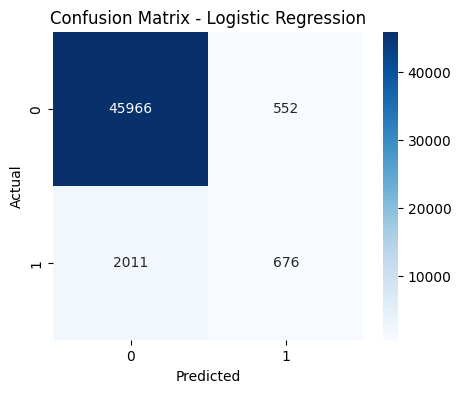

In [ ]:
# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

### 2. K-Nearest Neighbors (KNN)

In [ ]:
# Intialize and train KNN model
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, Y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)
y_pred_prob = knn.predict_proba(X_test_scaled)[:, 1]

KeyboardInterrupt: 

In [ ]:
#Model Evalution
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
roc_auc = roc_auc_score(Y_test, y_pred_prob)

In [ ]:
#Displaying the result of the Model Evaluation
print("K-Nearest Neighbors Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {roc_auc:.4f}")

In [ ]:
# Printing the Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()

### 3. Decision Tree

In [ ]:
# Initialize and Train Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

# Making predictions
y_pred = dt.predict(X_test)
y_pred_prob = dt.predict_proba(X_test)[:, 1]

In [ ]:
# Model Evaluation
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
roc_auc = roc_auc_score(Y_test, y_pred_prob)

In [ ]:
# Displaying the result of Model Evalution
print("Decision Tree Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {roc_auc:.4f}")

Decision Tree Performance Metrics:
Accuracy: 0.9115
Precision: 0.2405
Recall: 0.2881
F1 Score: 0.2622
AUC-ROC Score: 0.6178


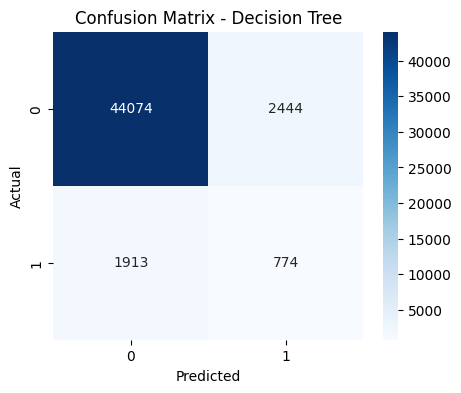

In [ ]:
# Plotting the Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

### 4. Random Forest

In [ ]:
# Initialize and Train Decision Tree model
rf = RandomForestClassifier(n_estimators=100, random_state=20029972)
rf.fit(X_train_scaled, Y_train)

# Make predictions
y_pred = rf.predict(X_test_scaled)
y_pred_prob = rf.predict_proba(X_test_scaled)[:, 1]

In [ ]:
# Model Evaluation
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
roc_auc = roc_auc_score(Y_test, y_pred_prob)

In [ ]:
# Displaying the results of the Model Evalution
print("Random Forest Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {roc_auc:.4f}")

Random Forest Performance Metrics:
Accuracy: 0.9488
Precision: 0.6030
Recall: 0.1820
F1 Score: 0.2796
AUC-ROC Score: 0.8802


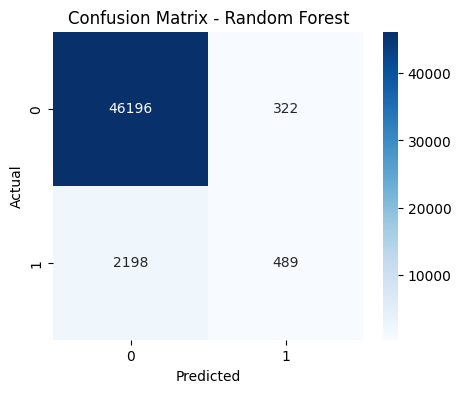

In [ ]:
# Printing the Confusion Matrix for Random Forest
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

### 5. Support Vector Machine (SVM)

In [ ]:
# Initialize base SVM
base_svm = LinearSVC(max_iter=5000)

# Wrap in CalibratedClassifierCV to enable probability prediction amd train the model
svm = CalibratedClassifierCV(base_svm)
svm.fit(X_train, Y_train)

# Predictions
y_pred = svm.predict(X_test)
y_pred_prob = svm.predict_proba(X_test)[:, 1]

In [ ]:
# Model Evalution
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
roc_auc = roc_auc_score(Y_test, y_pred_prob)

In [ ]:
# Print the results of Model Evalution
print("Support Vector Machine (SVM) Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {roc_auc:.4f}")

In [ ]:
# Displaying the Confusion Matrix for SVM
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()

### 6. Gradient Boosting Classifier

In [ ]:
# Initialize and train the Ridge Regression Model
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb.predict(X_test)

In [ ]:
# Model Evaluation
acc_gb = accuracy_score(y_test, y_pred_gb)
prec_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)

In [ ]:
# Displaying the result of the Model Evaluation
print("Gradient Boosting Classifier Performance Metrics:")
print(f"Accuracy: {acc_gb:.4f}")
print(f"Precision: {prec_gb:.4f}")
print(f"Recall: {recall_gb:.4f}")
print(f"F1-Score: {f1_gb:.4f}")

In [ ]:
# Plotting the actual vs predicted values
cm = confusion_matrix(y_test, y_pred_gb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()